In [1]:
# Imports and installations
from Support_Classes.Ring import Node, Direction, Ring
from Support_Classes.Algorithms import MinMax, MinMaxPlus
import random

In [2]:
# Defining the functions to run the program
def generate_random_ring(size):
    temp = [i for i in range(1, size + 1)]
    random.shuffle(temp)
    nodes = [Node(value, None, None) for value in temp]

    return nodes


def run_experiments(number_of_originators=2, size_of_ring=10, direction=Direction.RIGHT, animation_speed=500):
    # Let's generate a couple nodes to start and make sure we can graph them properly
    nodes_min_max = generate_random_ring(size_of_ring)
    nodes_min_max_plus = generate_random_ring(size_of_ring)

    # Get both algorithms
    min_max = MinMax()
    min_max_plus = MinMaxPlus()

    # Now let's link up the nodes in a ring
    ring_min_max = Ring(nodes_min_max, direction, min_max, number_of_originators)
    ring_min_max_plus = Ring(nodes_min_max_plus, direction, min_max_plus, number_of_originators)

    # Print all edges in order
    print(f"The edges (in direction {direction.value}) for the ring executing min-max are: "
          f"{[elem.get_edge(Direction.RIGHT) for elem in ring_min_max.nodes]}")
    print(f"The edges (in direction {direction.value}) for the ring executing min-max-plus are: "
          f"{[elem.get_edge(Direction.RIGHT) for elem in ring_min_max_plus.nodes]}")

    # Now let's test out leader election in the ring
    leader_node_min_max, messages_min_max = \
        ring_min_max.leader_election()
    print(f"We have elected a leader for min-max: {leader_node_min_max}")
    print(f"It required a total of {messages_min_max} messages\n\n")

    leader_node_min_max_plus, messages_min_max_plus = \
        ring_min_max_plus.leader_election()
    print(f"We have elected a leader for min-max-plus: {leader_node_min_max_plus}")
    print(f"It required a total of {messages_min_max_plus} messages")

    # Time to visualize the graph
    ring_min_max.visualize(animation_speed=animation_speed)
    ring_min_max_plus.visualize(animation_speed=animation_speed)

The edges (in direction Right) for the ring executing min-max are: [[3, 10], [10, 8], [8, 9], [9, 5], [5, 1], [1, 2], [2, 6], [6, 7], [7, 4], [4, 3]]
The edges (in direction Right) for the ring executing min-max-plus are: [[8, 6], [6, 3], [3, 7], [7, 4], [4, 10], [10, 9], [9, 2], [2, 1], [1, 5], [5, 8]]
We have elected a leader for min-max: 7
It required a total of 30 messages


We have elected a leader for min-max-plus: 3
It required a total of 33 messages


PermissionError: [Errno 13] Permission denied: 'animation_MinMax.gif'

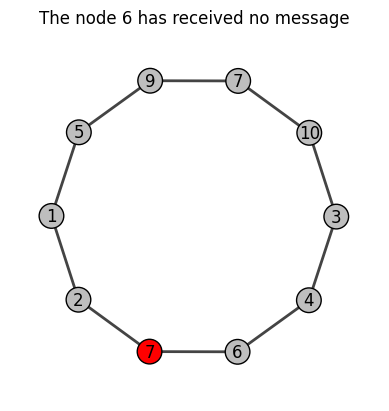

In [3]:
# Run the program

# direction is either Direction.LEFT or Direction.RIGHT
# animation_speed is initially set at 500. This is the number of milliseconds per frame. Increase this value
# to make the animation longer for each frame.
run_experiments(number_of_originators=5, size_of_ring=10, direction=Direction.RIGHT, animation_speed=500)